In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/kaggle/input/titanic-extended/train.csv")
test = pd.read_csv("/kaggle/input/titanic-extended/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [3]:
null_vals = train.isna().sum().sort_values(ascending=False)
print("Train:")
print(null_vals[null_vals > 0 ])

print("------")

null_vals = test.isna().sum().sort_values(ascending=False)
print("Test:")
print(null_vals[null_vals > 0 ])

Train:
Body           804
Cabin          687
Lifeboat       546
Age            177
Age_wiki         4
Embarked         2
Destination      2
Boarded          2
Hometown         2
Name_wiki        2
WikiId           2
Class            2
dtype: int64
------
Test:
Body           375
Cabin          327
Lifeboat       261
Age             86
Class            3
Name_wiki        3
Destination      3
Boarded          3
Hometown         3
Age_wiki         3
WikiId           3
Fare             1
dtype: int64


In [4]:
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train['Survived'].values
test_IDs = test['PassengerId'].copy()

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Survived','PassengerId','Cabin','Body', 'Ticket','Age_wiki','Name_wiki','WikiId','Hometown','Destination'], axis=1, inplace=True)
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Boarded,Lifeboat,Class
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Southampton,NaN,3.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Cherbourg,4,1.0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Southampton,14?,3.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Southampton,D,1.0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Southampton,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,Southampton,NaN,3.0
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Cherbourg,8,1.0
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Southampton,NaN,3.0
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,Southampton,NaN,3.0


In [5]:
null_vals = all_data.isna().sum().sort_values(ascending=False)
null_vals[null_vals > 0 ]

all_data['Lifeboat'] = all_data['Lifeboat'].fillna('None')

for col in null_vals[(null_vals < 10) & ( null_vals > 0)].index : 
    all_data[col] = all_data.groupby(["Pclass","Sex"])[col].transform(
        lambda x: x.fillna(x.mode()[0]))
all_data.isna().sum().sort_values(ascending=False)

Age         263
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Boarded       0
Lifeboat      0
Class         0
dtype: int64

In [6]:
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
all_data['IsAlone'] = all_data['FamilySize'] <= 1

In [7]:
all_data['Title'] = all_data['Name'].apply(lambda x : x.split(' ')[1].strip('123,./!?'))
all_data.drop('Name', axis = 1 , inplace = True)

all_data['Title'] = all_data['Title'].apply(lambda x : x if x in ['Mr','Miss','Mrs','Master'] else 'NoTitle')
all_data['Title'].value_counts()

Mr         736
Miss       256
Mrs        191
NoTitle     67
Master      59
Name: Title, dtype: int64

In [8]:
all_data['Age'] = all_data.groupby(['Pclass', 'Sex','Title']).Age.apply(lambda x: x.fillna(x.median()))
all_data["Age"].value_counts()

26.0    165
18.0     86
30.0     55
24.0     47
42.0     45
       ... 
23.5      1
20.5      1
55.5      1
66.0      1
38.5      1
Name: Age, Length: 98, dtype: int64

In [9]:
categorical_col = []
categorical_col = []
for col in all_data.columns:
    if all_data[col].dtype in [object, bool] and len(all_data[col].unique()) <= 50:
        if all_data[col].dtype in [object, bool] and len(all_data[col].unique()) <= 50:
            categorical_col.append(col)
categorical_col

['Sex', 'Embarked', 'Boarded', 'Lifeboat', 'IsAlone', 'Title']

In [10]:
for col in categorical_col:
    all_data[col] = all_data[col].astype("category").cat.codes
all_data[categorical_col].head()

,Sex,Embarked,Boarded,Lifeboat,IsAlone,Title
0,1,2,3,24,0,2
1,0,0,1,12,0,3
2,0,2,3,6,1,1
3,0,2,3,23,0,3
4,1,2,3,24,1,2


In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')

array_hot_encoded = ohe.fit_transform(all_data[categorical_col]).toarray()

data_hot_encoded = pd.DataFrame(array_hot_encoded, index=all_data.index)

In [12]:
data_other_cols = all_data.drop(columns=categorical_col)

all_data = pd.concat([data_hot_encoded, data_other_cols], axis=1)
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,Pclass,Age,SibSp,Parch,Fare,Class,FamilySize
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,3,22.0,1,0,7.2500,3.0,2
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1,38.0,1,0,71.2833,1.0,2
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3,26.0,0,0,7.9250,3.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1,35.0,1,0,53.1000,1.0,2
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,3,35.0,0,0,8.0500,3.0,1


In [13]:
all_data.columns = all_data.columns.astype(str)

In [14]:
train_data = all_data[:ntrain].copy()
test_data = all_data[ntrain:]

In [15]:
train_data['Survived'] = y_train
train_data['Survived'] = train_data['Survived'].astype("category").cat.codes

train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,Pclass,Age,SibSp,Parch,Fare,Class,FamilySize,Survived
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,3,22.0,1,0,7.2500,3.0,2,0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1,38.0,1,0,71.2833,1.0,2,1
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,3,26.0,0,0,7.9250,3.0,1,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1,35.0,1,0,53.1000,1.0,2,1
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,3,35.0,0,0,8.0500,3.0,1,0


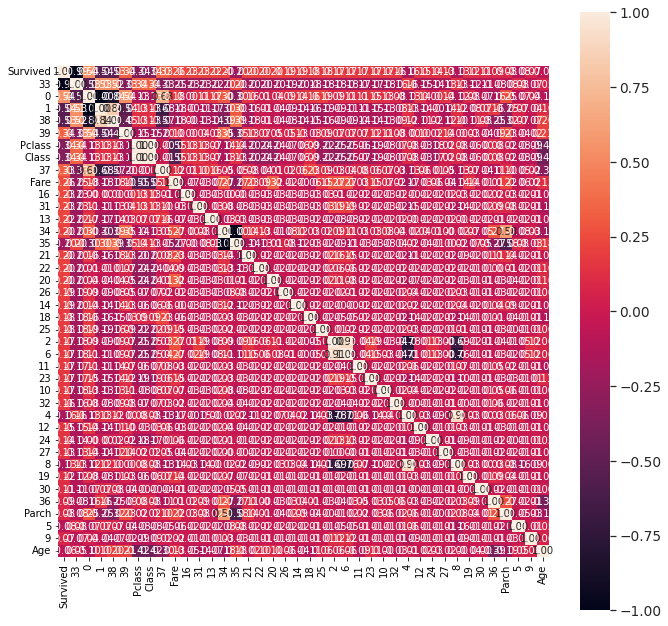

((891, 40), (418, 39))

In [16]:
k = 40
f,ax = plt.subplots(figsize=(11, 11))
cols = train_data.corr().abs().nlargest(k, 'Survived')['Survived'].index  
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

train_data = train_data[cols]
test_data = test_data[cols.drop('Survived')]
train_data.shape , test_data.shape

In [17]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(contamination = 0.02)

outliers = clf.fit_predict(train_data)

train_data_cleaned = train_data[np.where(outliers == 1, True, False)]
train_data_cleaned.shape

(873, 40)

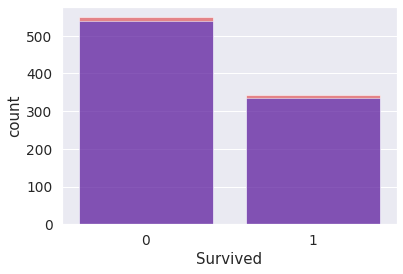

In [18]:
sns.countplot(x = train_data['Survived'], label = "Original", color = 'red' , alpha = 0.5)
sns.countplot(x = train_data_cleaned['Survived'], label = "Modified" , color = 'blue',alpha = 0.5)
X_train = train_data_cleaned.drop('Survived', axis = 1)
y_train = train_data_cleaned.Survived

0    538
1    335
Name: Survived, dtype: int64
0    538
1    538
Name: Survived, dtype: int64


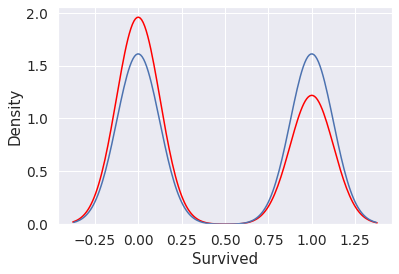

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE( random_state=42)

print(y_train.value_counts())
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)
print(y_resampled.value_counts())

sns.kdeplot(y_train, label = "Original" , color = 'red')
sns.kdeplot(y_resampled, label = "Modified")
X_train = X_resampled
y_train = y_resampled

In [20]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PowerTransformer
from sklearn.model_selection import GridSearchCV , cross_val_score

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
test_data_scaled = scaler.transform(test_data)

In [21]:
from catboost import CatBoostClassifier
pipeline_catB=Pipeline([ ('CatBoostClassifier',CatBoostClassifier(verbose = 0 ))])

cat = CatBoostClassifier(eval_metric='Accuracy',
                        verbose = 0)

#USING GRID SEARCH
params_catB = {
    'learning_rate' : [0.01,0.02,0.03,],
          'depth': [6,7,],
    'iterations' : [450,1000,]
         }

grid_search_cat = GridSearchCV(estimator=cat,verbose = 1, param_grid=params_catB, cv = 3,scoring='accuracy',n_jobs=-1).fit(X_train.values, y_train.values.ravel())
cat_best = grid_search_cat.best_estimator_
print('CatBoost Best Score',grid_search_cat.best_score_)
print('CatBoost Best Parmas',grid_search_cat.best_params_)
print('CatBoost Accuracy',cross_val_score(cat_best,X_train.values, y_train.values.ravel(), cv=3).mean())

Fitting 3 folds for each of 12 candidates, totalling 36 fits
CatBoost Best Score 0.9962807923935202
CatBoost Best Parmas {'depth': 6, 'iterations': 450, 'learning_rate': 0.01}
CatBoost Accuracy 0.9962807923935202


In [22]:
predictions = cat_best.predict(test_data.values)

In [23]:
sub = pd.DataFrame()
sub['PassengerId'] = test_IDs
sub['Survived'] = predictions
sub['Survived'] = sub['Survived']
sub.to_csv('submission.csv',index=False)